# **Regresión Lineal**

## **Librerias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_columns = False

In [3]:
from datetime import datetime, timedelta
import winsound

In [4]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

## **Datos**

In [5]:
df = pd.read_csv('Data/insurance.csv')

In [6]:
df.reset_index(inplace=True)
df = df.rename(columns={'index':'ID'})

In [7]:
df.head()

,ID,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


## **Análisis de los datos**

In [8]:
df.describe()

,ID,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,668.500000,39.207025,30.663397,1.094918,13270.422265
std,386.391641,14.049960,6.098187,1.205493,12110.011237
min,0.000000,18.000000,15.960000,0.000000,1121.873900
25%,334.250000,27.000000,26.296250,0.000000,4740.287150
50%,668.500000,39.000000,30.400000,1.000000,9382.033000
75%,1002.750000,51.000000,34.693750,2.000000,16639.912515
max,1337.000000,64.000000,53.130000,5.000000,63770.428010


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


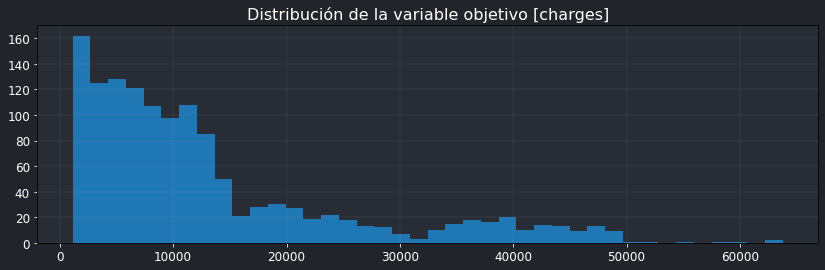

In [10]:
fig, ax = plt.subplots(figsize=(14, 4))
plt.title('Distribución de la variable objetivo [charges]', color='white', size=16)

fig.patch.set_facecolor('#21252b') 
ax.set_facecolor('#282c34') 

plt.hist(df['charges'], bins=40)

plt.xticks(color='white', size=12)
ax.tick_params(axis='x', labelcolor='white', color='white')

plt.yticks(color='white', size=12)
ax.tick_params(axis='y', labelcolor='white', color='white')

plt.grid(linewidth=0.1)

plt.show()

In [11]:
df['charges_log'] = df['charges'].apply(lambda x: np.log(x))

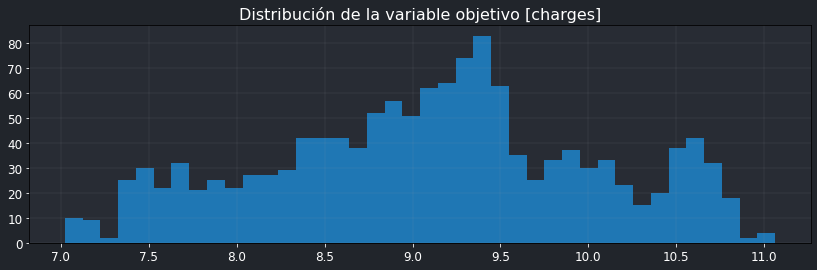

In [12]:
fig, ax = plt.subplots(figsize=(14, 4))
plt.title('Distribución de la variable objetivo [charges]', color='white', size=16)

fig.patch.set_facecolor('#21252b') 
ax.set_facecolor('#282c34') 

plt.hist(df['charges_log'], bins=40)

plt.xticks(color='white', size=12)
ax.tick_params(axis='x', labelcolor='white', color='white')

plt.yticks(color='white', size=12)
ax.tick_params(axis='y', labelcolor='white', color='white')

plt.grid(linewidth=0.1)

plt.show()

In [13]:
standarScaler = StandardScaler()
standarScaler.fit(np.array(df['charges_log']).reshape(-1, 1))

StandardScaler()

In [14]:
df['charges_log_est'] = standarScaler.transform(np.array(df['charges_log']).reshape(-1, 1))

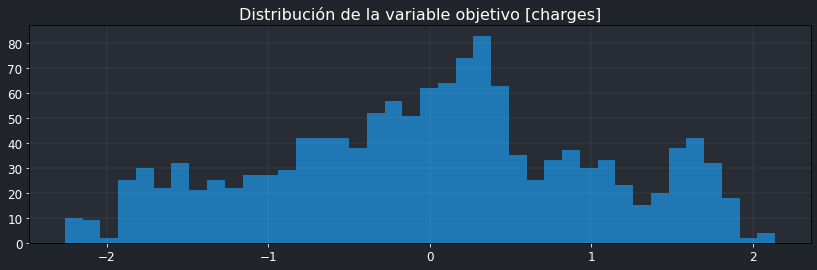

In [15]:
fig, ax = plt.subplots(figsize=(14, 4))
plt.title('Distribución de la variable objetivo [charges]', color='white', size=16)

fig.patch.set_facecolor('#21252b') 
ax.set_facecolor('#282c34') 

plt.hist(df['charges_log_est'], bins=40)

plt.xticks(color='white', size=12)
ax.tick_params(axis='x', labelcolor='white', color='white')

plt.yticks(color='white', size=12)
ax.tick_params(axis='y', labelcolor='white', color='white')

plt.grid(linewidth=0.1)

plt.show()

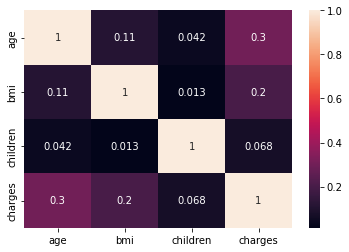

In [16]:
sns.heatmap(df[['age', 'bmi', 'children', 'charges']].corr(), annot=True)
plt.show()

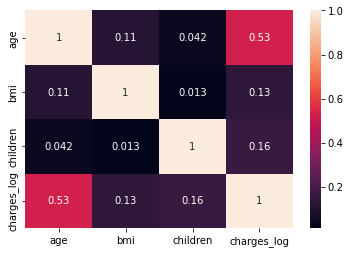

In [17]:
sns.heatmap(df[['age', 'bmi', 'children', 'charges_log']].corr(), annot=True)
plt.show()

### **Analizamos las variables explicativas**

#### **1.Edad**

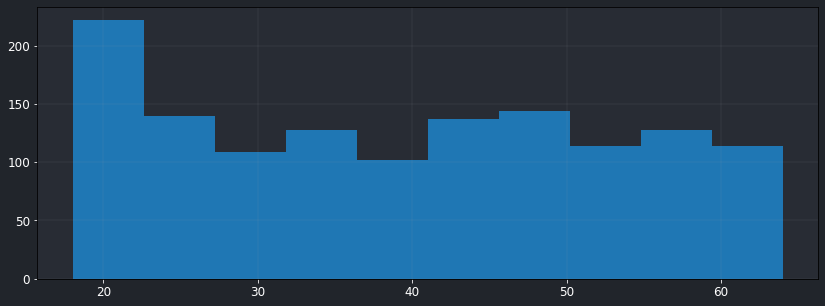

In [18]:
fig, ax = plt.subplots(figsize=(14, 5))

fig.patch.set_facecolor('#21252b') 
ax.set_facecolor('#282c34') 

plt.hist(df['age'])
# plt.hist(df['age'].apply(lambda x: np.log(x)))

plt.xticks(color='white', size=12)
ax.tick_params(axis='x', labelcolor='white', color='white')

plt.yticks(color='white', size=12)
ax.tick_params(axis='y', labelcolor='white', color='white')

plt.grid(linewidth=0.1)

plt.show()

In [19]:
df['age_log']=df['age'].apply(lambda x: np.log(x))

#### **2.Sexo**

In [20]:
df_sex = pd.get_dummies(df['sex']).reset_index()

In [21]:
df = pd.merge(df.reset_index(), df_sex, how='left', left_on='index', right_on='index').drop('index', axis=1)

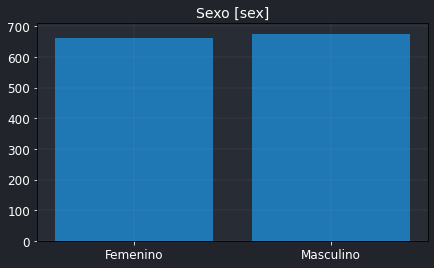

In [22]:
names = ['Femenino', 'Masculino']
values = [df.groupby('sex')[['ID']].count().loc['female']['ID'], df.groupby('sex')[['ID']].count().loc['male']['ID']]

fig, ax = plt.subplots(figsize=(7, 4))

plt.title('Sexo [sex]', fontsize=14 ,color='white')

fig.patch.set_facecolor('#21252b')
ax.set_facecolor('#282c34')

plt.bar(names, height=values, width=0.8)

plt.xticks(color='white', fontsize=12)
ax.tick_params(axis='x', color='white')

plt.yticks(color='white', fontsize=12)
plt.tick_params(axis='y', color='white')

plt.grid(linewidth=0.1)
plt.show()

#### **3.Indice de masa corporal**

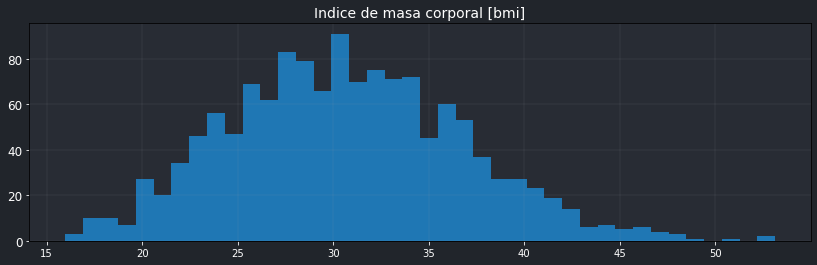

In [23]:
fig, ax = plt.subplots(figsize = (14, 4))
plt.title('Indice de masa corporal [bmi]', fontsize=14, color='white')

fig.patch.set_facecolor('#21252b') 
ax.set_facecolor('#282c34') 

plt.hist(df['bmi'], bins=40)

plt.yticks(color='white', size=12)
ax.tick_params(axis='x', labelcolor='white', color='white')

plt.yticks(color='white', size=12)
ax.tick_params(axis='y', labelcolor='white', color='white')

plt.grid(linewidth=0.1)

plt.show()

#### **4.Número de hijos**

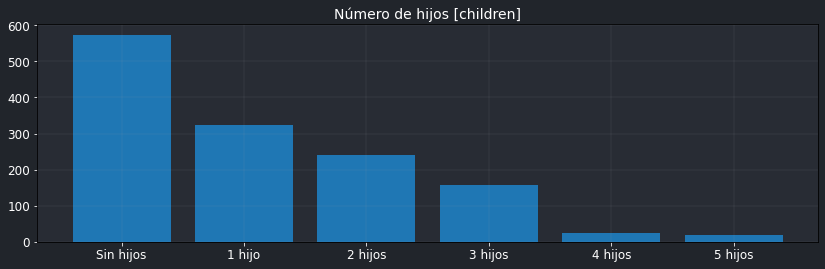

In [24]:
names = ['Sin hijos', '1 hijo', '2 hijos', '3 hijos', '4 hijos', '5 hijos']
values = [
    df.groupby('children')[['ID']].count().loc[0]['ID'], 
    df.groupby('children')[['ID']].count().loc[1]['ID'], 
    df.groupby('children')[['ID']].count().loc[2]['ID'], 
    df.groupby('children')[['ID']].count().loc[3]['ID'], 
    df.groupby('children')[['ID']].count().loc[4]['ID'], 
    df.groupby('children')[['ID']].count().loc[5]['ID'], 
]

fig, ax = plt.subplots(figsize=(14, 4))

plt.title('Número de hijos [children]', fontsize=14 ,color='white')

fig.patch.set_facecolor('#21252b')
ax.set_facecolor('#282c34')

plt.bar(names, height=values, width=0.8)

plt.xticks(color='white', fontsize=12)
ax.tick_params(axis='x', color='white')

plt.yticks(color='white', fontsize=12)
plt.tick_params(axis='y', color='white')

plt.grid(linewidth=0.1)
plt.show()